In [9]:
import pandas as pd
df = pd.read_csv('Result_6.csv', usecols= ['rank','last_unit_id'])
df.head(4)

,rank,last_unit_id
0,9171-Sergeant Of Police,17
1,9171-Sergeant Of Police,215
2,9171-Sergeant Of Police,194
3,9171-Sergeant Of Police,218


In [10]:
from collections import defaultdict
drank = defaultdict(list)
for row in df.iloc():
    officer_rank = row[0][0:4]
#     print(officer_rank)
    unit_id = row[1]
    if unit_id in drank:
        drank[unit_id].append(officer_rank)
    else:
        drank[unit_id] = [officer_rank]

In [11]:
open('rank_combination.txt', 'w').close()
for key in drank.keys():
    officer_rank = drank[key]
    ranks = []
    f = open("rank_combination.txt", "a")
    for one in officer_rank:
        for two in officer_rank:
            if one == two:
                continue
            else:
                ranks.append(str(one) + ' ' + str(two) + ' \n')
    f.writelines(ranks)
    f.close()

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

rk = nx.read_edgelist('rank_combination.txt', create_using=nx.Graph(), nodetype=str)
print(nx.info(rk))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 375
Average degree:  23.4375


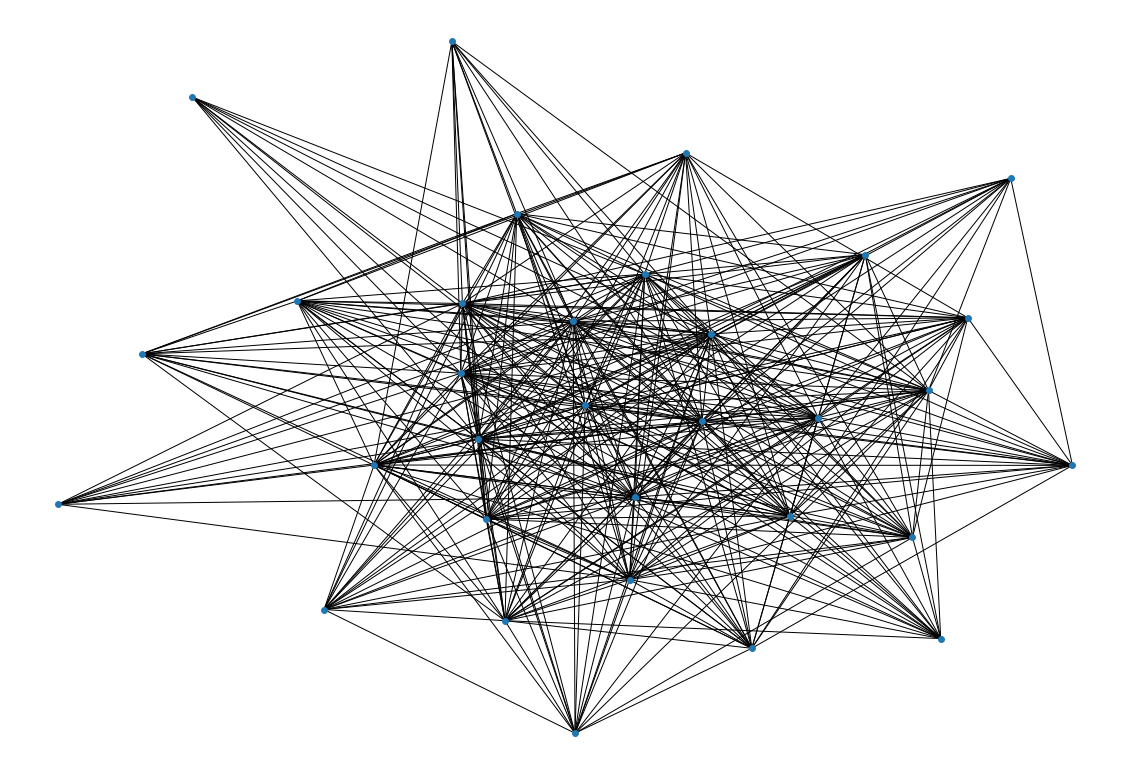

In [13]:
# create a spring-layout of rk
pos = nx.spring_layout(rk)

plt.figure(figsize=(20,14))

plt.axis('off')

nx.draw_networkx(rk, pos=pos, with_labels=False, node_size=35)

In [14]:
# find the order and size of our network
print(rk.order())
print(rk.size())
print(nx.betweenness_centrality(rk, normalized=True))
print(rk.degree()) # find the number of degree

32
375
{'9171': 0.021564109773437645, '9165': 0.021564109773437645, '9161': 0.021564109773437645, '9173': 0.021564109773437645, '9168': 0.008742885913314355, '9164': 0.021564109773437645, '9206': 0.016179231807914522, '9126': 0.0010227352589781433, '9154': 0.0004935713202466423, '9175': 0.021564109773437645, '9796': 0.011232052344606025, '9152': 0.007500604054334204, '9174': 0.017779101472300312, '9752': 0.021564109773437645, '9151': 0.011771047399730113, '9233': 0.004514108155124832, '9153': 0.010092284108063596, '9155': 0.0009080047789725209, '9216': 0.00010752688172043011, '9169': 0.007696587528306293, '9163': 0.000794189775514054, '9201': 0.005484086240852444, '9160': 0.0011016974229797558, '9016': 0.0, '9232': 0.0006144393241167435, '9755': 0.0, '9106': 0.00037335722819593784, '9177': 0.0024783892051444237, '9234': 0.0, '9202': 0.0003803851289619791, '9237': 0.0, '9785': 0.0}
[('9171', 31), ('9165', 31), ('9161', 31), ('9173', 31), ('9168', 27), ('9164', 31), ('9206', 30), ('9126'

In [15]:
# find the number of triangles in the network
print(nx.triangles(rk))

{'9171': 344, '9165': 344, '9161': 344, '9173': 344, '9168': 294, '9164': 344, '9206': 336, '9126': 202, '9154': 149, '9175': 344, '9796': 308, '9152': 277, '9174': 333, '9752': 344, '9151': 308, '9233': 267, '9153': 312, '9155': 203, '9216': 119, '9169': 298, '9163': 184, '9201': 264, '9160': 222, '9016': 55, '9232': 149, '9755': 91, '9106': 150, '9177': 234, '9234': 136, '9202': 168, '9237': 66, '9785': 36}


In [16]:
print(nx.clustering(rk))

{'9171': 0.7397849462365591, '9165': 0.7397849462365591, '9161': 0.7397849462365591, '9173': 0.7397849462365591, '9168': 0.8376068376068376, '9164': 0.7397849462365591, '9206': 0.7724137931034483, '9126': 0.9619047619047619, '9154': 0.9738562091503268, '9175': 0.7397849462365591, '9796': 0.8148148148148148, '9152': 0.8523076923076923, '9174': 0.7655172413793103, '9752': 0.7397849462365591, '9151': 0.8148148148148148, '9233': 0.89, '9153': 0.8253968253968254, '9155': 0.9666666666666667, '9216': 0.9916666666666667, '9169': 0.8490028490028491, '9163': 0.968421052631579, '9201': 0.88, '9160': 0.961038961038961, '9016': 1.0, '9232': 0.9738562091503268, '9755': 1.0, '9106': 0.9803921568627451, '9177': 0.924901185770751, '9234': 1.0, '9202': 0.9824561403508771, '9237': 1.0, '9785': 1.0}


(array([14., 11.,  4.,  0.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

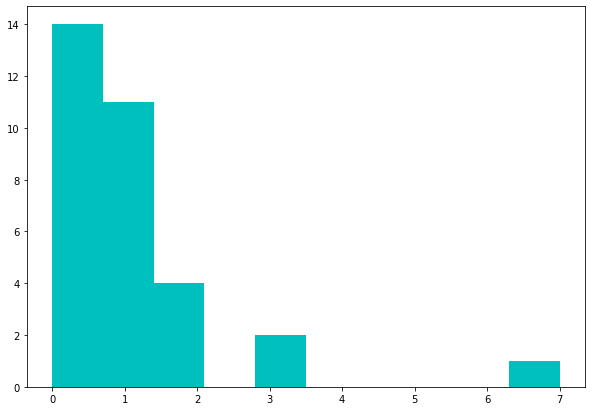

In [17]:
# draw histogram of degrees
plt.figure(figsize=(10,7))
hst = nx.degree_histogram(rk)
plt.hist(hst, bins=10, color='c')

<BarContainer object of 32 artists>

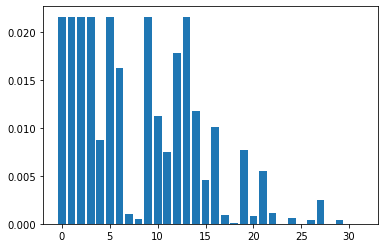

In [18]:
# draw a bar chart of the betweenness centrality
bc = nx.betweenness_centrality(rk)
plt.bar(range(len(bc)), bc.values(), align='center')